## Лабораторная работа №2: Фильтрация изображений

Вариант: №2

Выполнил: Гершевский Егор

Группа: 6131-010402D

1. Считать цветное rgb изображение

2. Зашумить изображение аддитивным шумом с вероятностью p (по вариантам).

3. Написать функцию реализации ранговой фильтрации

4. Отфильтровать зашумленное изображение со всеми возможными рангами (кол-во рангов зависит от окна по вариантам). Подсчитать СКО для результата фильтрации с каждым рангом.

5. Написать функцию реализации свертки

6. Отфильтровать изображение КИХ фильтром с ядром заданным по вариантам. Подсчитать СКО. Сравнить с результатами пункта 4.

In [1]:
from itertools import product
from warnings import filterwarnings

import cv2
import matplotlib.pyplot as plt
from IPython.display import clear_output
from matplotlib.pyplot import *
from tqdm.notebook import tqdm

filterwarnings("ignore")
%matplotlib inline
plt.rcParams["figure.figsize"] = (10, 10)

In [2]:
def show_image(image):
    """Функция для вывода изображения."""
    plt.axis('off')
    plt.imshow(image)

In [5]:
# Вероятность p
PROBABILITY = 0.14

# Окно ранговой фильтрации
KERNEL = np.array([
    [0, 0, 1, 0, 0],
    [0, 0, 1, 0, 0],
    [1, 1, 3, 1, 1],
    [0, 0, 1, 0, 0],
    [0, 0, 1, 0, 0]
])

# Ядро КИХ фильтра
FIR_KERNEL = (1/7) * np.array([
    [1, 0, 1], 
    [0, 3, 0], 
    [1, 0, 1]
])

# Задание 1. 
Считать цветное RGB изображение

Исходное изображение:


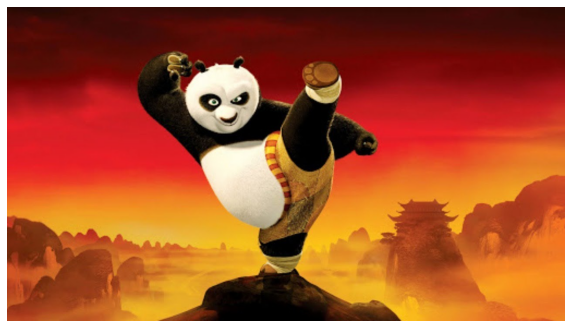

In [6]:
image = cv2.cvtColor(cv2.imread('../images/po.jpg'), cv2.COLOR_BGR2RGB)
print('Исходное изображение:')
show_image(image)

# Задание 2. 
Зашумить изображение аддитивным шумом с вероятностью p.


In [7]:
def add_noise(image, probability):
    """Функция для нанесения шума на изображения с заданной вероятностью p."""
    image_rows, image_cols, image_channels = image.shape
    output_image = np.copy(image)
    pixels = []

    for pixel in list(product(range(image_rows), range(image_cols))):
        if np.random.random() <= probability:
            pixels.append(pixel)

    for pixel in tqdm(pixels):
        for image_channel in range(image_channels):
            if output_image[pixel[0], pixel[1]][image_channel] + 50 > 255:
                output_image[pixel[0], pixel[1]][image_channel] = 255
            else:
                output_image[pixel[0], pixel[1]][image_channel] += 50

    clear_output()
    return output_image

Исходное изображение:


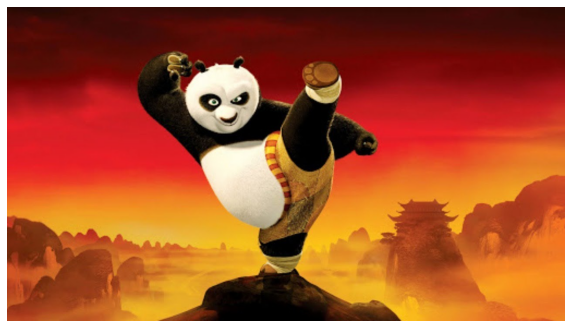

In [8]:
print('Исходное изображение:')
show_image(image)

Зашумленное изображение:


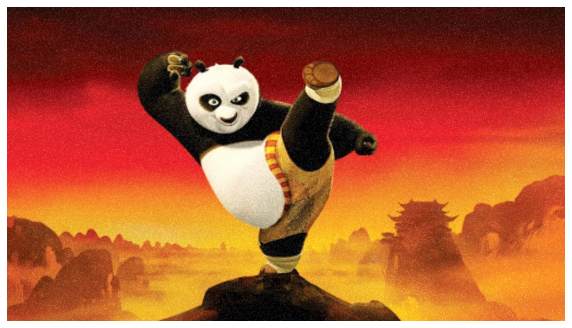

In [9]:
image_noise = add_noise(image, PROBABILITY)
print('Зашумленное изображение:')
show_image(image_noise)

# Задание 3. 
Написать функцию реализации ранговой фильтрации

In [10]:
def get_value(image, kernel, rank):
    """Вспомогательная функция для получения значения."""
    image_rows, image_cols, image_channels = image.shape
    output_image = np.zeros((image_channels,))

    for image_channel in range(image_channels):
        vals = []
        for i in range(image_rows):
            for j in range(image_cols):
                for _ in range(kernel[i, j]):
                    vals.append(image[i, j, image_channel])

        output_image[image_channel] = np.sort(vals, axis=0)[rank]

    return output_image

In [11]:
def rank_filtering(image, kernel, rank):
    """Функция ранговой фильтрации."""
    image_rows, image_cols, image_channels = image.shape
    kernel_cols, kernel_rows = kernel.shape[0] // 2, kernel.shape[1] // 2
    output_image = np.zeros(
        (image_rows, image_cols, image_channels), dtype=np.uint8)

    for i in tqdm(range(kernel_rows, image_rows - kernel_rows)):
        for j in range(kernel_cols, image_cols - kernel_cols):
            current_window = image[
                i - kernel_rows: i + kernel_rows + 1,
                j - kernel_cols: j + kernel_cols + 1,
            ]
            output_image[i, j] = get_value(current_window, kernel, rank)

    clear_output()
    return output_image

Исходное изображение:


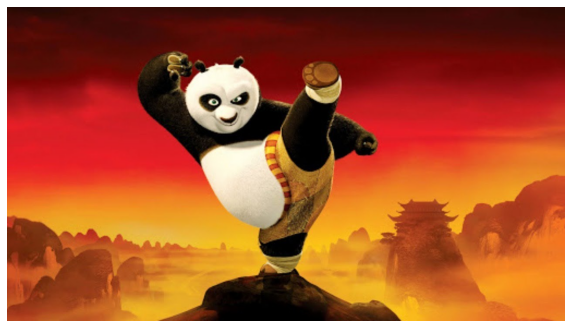

In [12]:
print("Исходное изображение:")
show_image(image)

Зашумленное изображение:


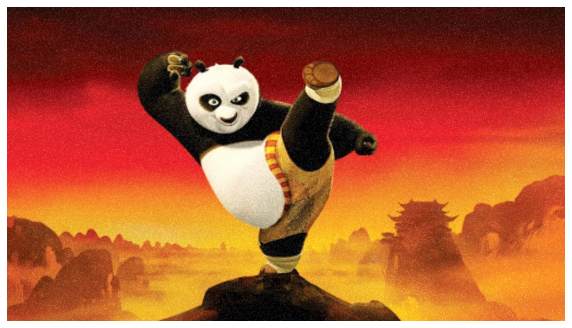

In [13]:
print('Зашумленное изображение:')
show_image(image_noise)

Отфильтрованное изображение:


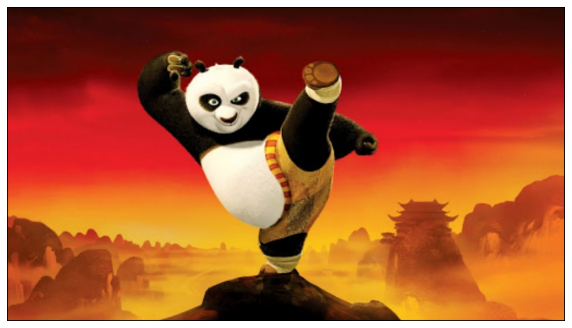

In [14]:
filtering_image = rank_filtering(image_noise, KERNEL, 3)
print('Отфильтрованное изображение:')
show_image(filtering_image)

# Задание 4. 
Отфильтровать зашумленное изображение со всеми возможными рангами (кол-во рангов зависит от окна по вариантам). Подсчитать СКО для результата фильтрации с каждым рангом.

In [15]:
def calculating_mse(image, image_noise):
    """Функция для подсчета СКО."""
    return np.sum((image - image_noise) ** 2) / (
        image.shape[0] * image.shape[1] * image.shape[2]
    )

In [16]:
results = []

for rank in tqdm(range(1, np.sum(KERNEL.flatten()))):
    mse = calculating_mse(image, rank_filtering(image_noise, KERNEL, rank))
    results.append((rank, mse))
    clear_output()
    print(f'Rank: {rank}, MSE: {mse}')

sorted_results = sorted(results, key=lambda x: x[1])

Rank: 10, MSE: 108.63618923611111


In [17]:
sorted_results

[(4, 2.5385091145833334),
 (3, 3.4807136140046295),
 (5, 4.508987630208333),
 (2, 5.698540943287037),
 (1, 9.860366753472222),
 (6, 10.80021484375),
 (7, 24.129057074652778),
 (8, 43.1875806568287),
 (9, 69.21924225983797),
 (10, 108.63618923611111)]

Исходное изображение:
MSE: 0.0


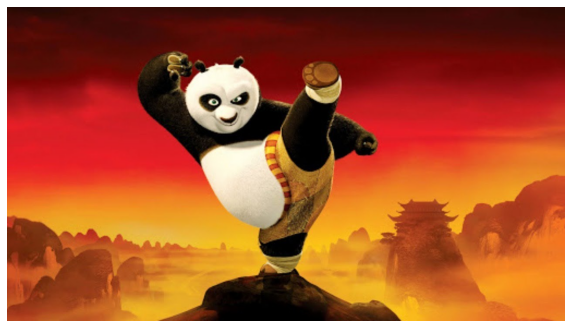

In [18]:
print('Исходное изображение:')
print(f'MSE: {calculating_mse(image, image)}')
show_image(image)

Зашумленное изображение:
MSE: 25.436778428819444


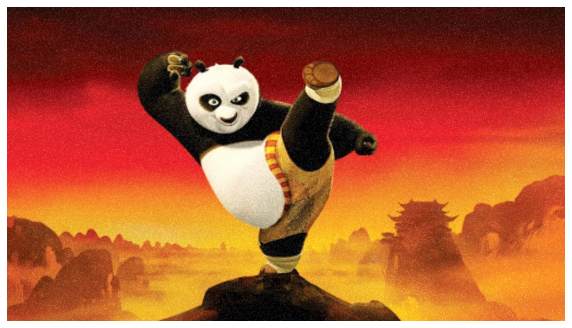

In [19]:
print('Зашумленное изображение:')
print(f'MSE: {calculating_mse(image, image_noise)}')
show_image(image_noise)

Rank: 1
MSE first rank: 9.860366753472222


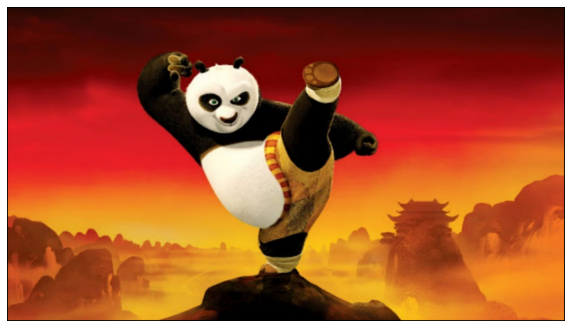

In [20]:
first_rank_image = rank_filtering(image_noise, KERNEL, 1)
print(f'Rank: {1}')
print(f'MSE first rank: {calculating_mse(image, first_rank_image)}')
show_image(first_rank_image)

Rank: 10
MSE last rank: 108.63618923611111


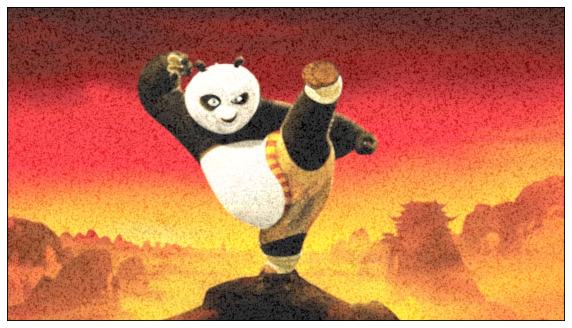

In [21]:
last_rank_image = rank_filtering(image_noise, KERNEL, 10)
print(f'Rank: {10}')
print(f'MSE last rank: {calculating_mse(image, last_rank_image)}')
show_image(last_rank_image)

Best rank: 4
MSE best rank: 2.5385091145833334


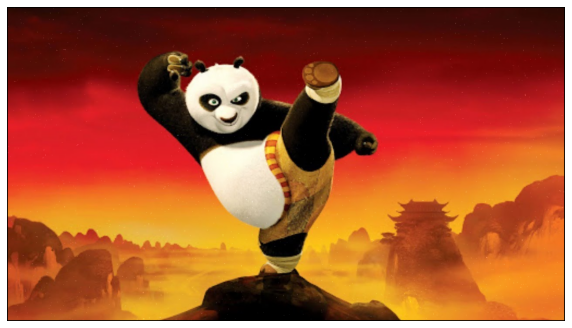

In [22]:
best_filtering_image = rank_filtering(
    image_noise, KERNEL, sorted_results[0][0])
print(f'Best rank: {sorted_results[0][0]}')
print(f'MSE best rank: {calculating_mse(image, best_filtering_image)}')
show_image(best_filtering_image)

# Задание 5. 

Написать функцию реализации свертки

In [23]:
def convolution(image, kernel):
    """Функция свертки."""
    __kernel = np.flipud(np.fliplr(kernel))
    image_rows, image_cols, image_channels = image.shape
    kernel_rows, kernel_cols = kernel.shape
    output_image = np.zeros_like(image)

    if kernel_rows % 2 == 0:
        output_image_rows = image_rows + (kernel_rows // 2)
        copy_rows = (0, image_rows)
    else:
        output_image_rows = image_rows + 2 * (kernel_rows // 2)
        copy_rows = (kernel_rows // 2, output_image_rows - (kernel_rows // 2))

    if kernel_cols % 2 == 0:
        output_image_cols = image_cols + (kernel_cols // 2)
        copy_cols = (0, image_cols)
    else:
        output_image_cols = image_cols + 2 * (kernel_cols // 2)
        copy_cols = (kernel_cols // 2, output_image_cols - (kernel_cols // 2))

    img = np.zeros((output_image_rows, output_image_cols, image_channels))
    img[copy_rows[0]: copy_rows[1], copy_rows[0]: copy_cols[1], :] = image

    for i, j, k in tqdm(np.ndindex((image_rows, image_cols, image_channels))):
        output_image[i, j, k] = np.sum(
            __kernel * img[i: i + kernel_rows, j: j + kernel_cols, k]
        )

    clear_output()
    return output_image

# Задание 6. 
Отфильтровать изображение КИХ фильтром с ядром заданным по вариантам. Подсчитать СКО. Сравнить с результатами пункта 4.

Исходное изображение:
MSE: 0.0


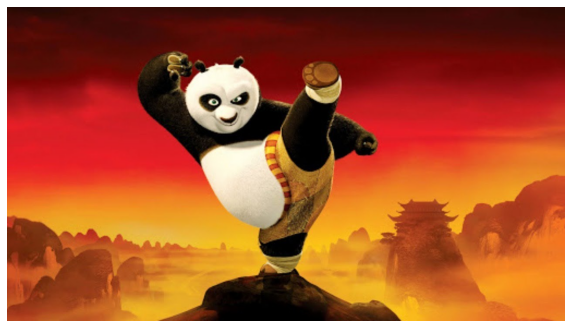

In [24]:
print('Исходное изображение:')
print(f'MSE: {calculating_mse(image, image)}')
show_image(image)

Зашумленное изображение:
MSE: 25.436778428819444


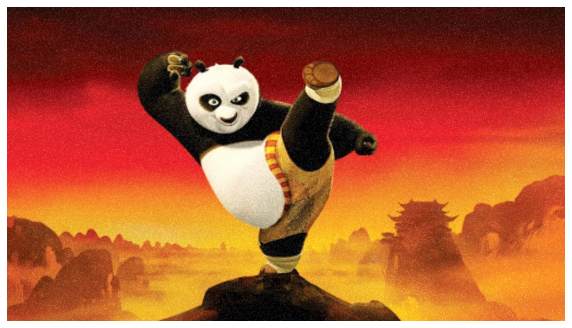

In [25]:
print('Зашумленное изображение:')
print(f'MSE: {calculating_mse(image, image_noise)}')
show_image(image_noise)

Изображение после КИХ-фильтра
FIR:
[[0.14285714 0.         0.14285714]
 [0.         0.42857143 0.        ]
 [0.14285714 0.         0.14285714]]
MSE: 43.74409722222222


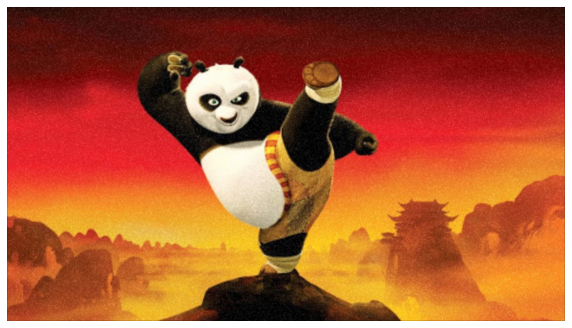

In [26]:
image_fir_filter = convolution(image_noise, FIR_KERNEL)
print('Изображение после КИХ-фильтра')
print(f'FIR:\n{FIR_KERNEL}')
print(f'MSE: {calculating_mse(image, image_fir_filter)}')
show_image(image_fir_filter)

# Выводы.

Ранговая фильтрация с рангом 2 справилась с фильтрацией намного лучше, чем фильтрация с КИХ фильтром (1/7) * ([1, 0, 1], [0, 3, 0], [1, 0, 1])